## Spatial data science with `tidycensus`: VA home price

*More similar posts in my [blog](https://data2decision.net/). Follow me on [Twitter](https://twitter.com/DataEnthus) for announcement of new analysis.I can be reached via email: mab[dot]datasc@gmail[dot]com* 

<p ><br>The "market temperature" of Virginia is "Very Hot", [according to Zillow](https://www.zillow.com/va/home-values/). How hot is it? Compare median home price in VA (\\$250k), with neighboring states of NC (\\$184k), PA (\\$173k) and WV (\\$97k). Northern virginia, part of Washington DC Metro Area, seems to be driving a lot of this state-wide home price. With Amazon showing up in Crystal City and [bringing in 25,000 more jobs with them](https://www.nytimes.com/2019/02/15/technology/amazon-virginia-crystal-city.html), further skyrocketing of real estate price is almost guaranteed.<br></p>
    
<p><br>Implications being, middle class is driven out the region, or else, two-thirds of their pay check going into house rents. With that in mind in this notebook I was interested in the spatial distribution of home prices, first starting with Virginia overall, then zooming in on northern Virginia.<br></p>

<p><br>Fortunately, we do not have to start from scratch to make these maps. As always the case, someone has already done the hard work for us so we can stand on their shoulders.[Kyle Walker](https://walkerke.github.io/) in this case has developed an `rstat` package called [`tidycensus`](https://github.com/walkerke/tidycensus). This package allows for easy access, analysis and visualization of Census Beureau data on hundreds of variables.<br></p>

<p><br>Not that in Python you can not do spatial analysis/visualization of census data, but certainly not as easily as in R because of some excellent rstats packages available and tailored for this purpose.To be able to use `tidycensus` you'll need your own Census API Key. If you do not have one, [get one](https://www.census.gov/developers/).The only other library you'll need is `tidyverse`; and this is it! If you like interactive visialization of maps (i.e. zoom in zoom out etc.) you will need additional libraries and codes.<br></p> 

Okay, so here we go ... 

---

### Codes

In [1]:
# import libraries
library(tidycensus)
library(tidyverse)
options(tigris_use_cache = TRUE)

# get your Census Bureau API key
census_api_key("Your Key Here")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.7
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.3.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
To install your API key for use in future sessions, run this function with `install = TRUE`.


Getting data from the 2012-2016 5-year ACS


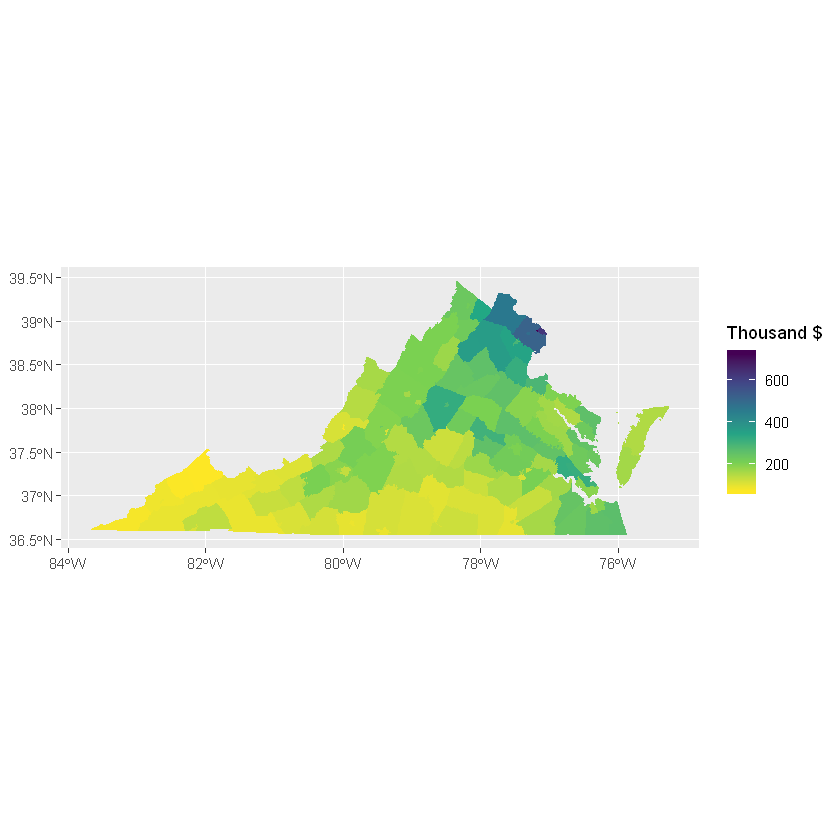

In [2]:
# geting the variable from acs data for state and geography of interest
variable <- get_acs(state = "VA", geography = "county", 
                  variables = "B25077_001", geometry = TRUE)
# plot the variable
variable %>%
  ggplot(aes(fill = estimate/1000)) + labs(fill="Thousand $")+
  geom_sf(color = NA) + 
  coord_sf(crs = "+init=epsg:4326") + 
  scale_fill_viridis_c(option = "viridis", direction=-1)

## Zooming in on Northern Virginia

Getting data from the 2012-2016 5-year ACS


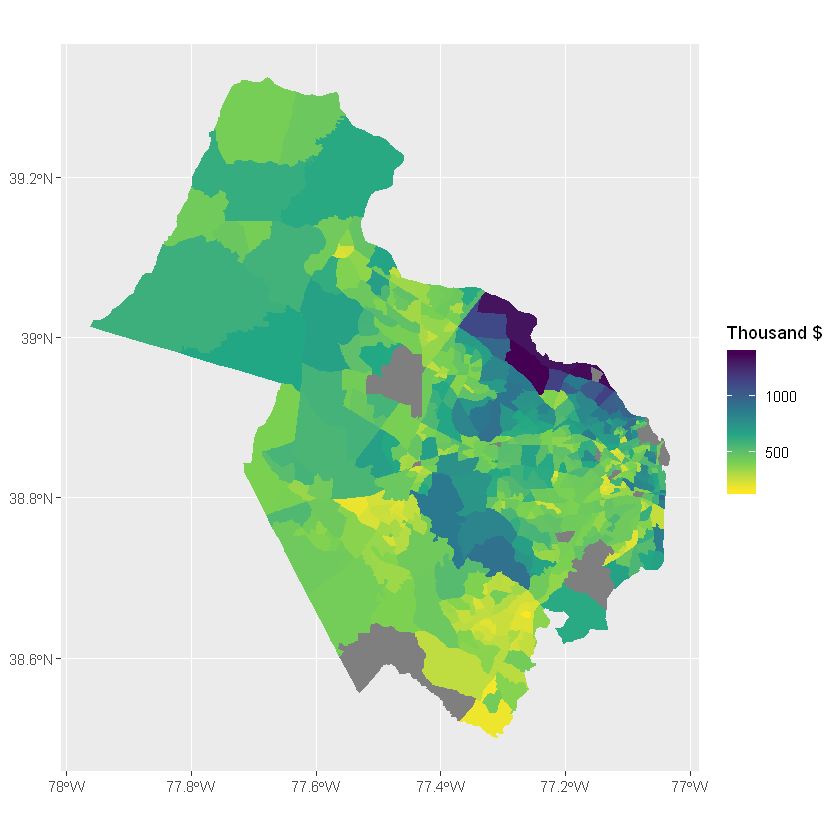

In [3]:
# specify the location of interest
location = c("Fairfax County", "Fairfax City", "Manassas Park City", "Arlington County", "Loudoun County", "Alexandria City", "Falls Church City", "Prince William County", "Manassas City")

# get get data on the variable of interest for the location
variable_location <- get_acs(state = "VA", county = location, geography = "tract", 
                  variables = "B25077_001", geometry = TRUE)

# plot the variable

variable_location %>%
  ggplot(aes(fill = estimate/1000)) + labs(fill="Thousand $")+
  geom_sf(color = NA) + 
  coord_sf(crs = "+init=epsg:4326") + 
  scale_fill_viridis_c(option = "viridis", direction=-1) #  original: scale_fill_viridis_c(option = "magma") 